<a href="https://colab.research.google.com/github/Pulak-Deb/Kaggle_Competitions/blob/main/Insurance_data_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#!pip install ydata_profiling

In [2]:
test= pd.read_csv('test.csv')
test_ids= test['id']

In [3]:
df=pd.read_csv('train.csv')
df.head()


,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [4]:
df = df.dropna(subset=['Premium Amount'])

In [5]:
df['Premium Amount'].isnull().sum()

0

In [6]:
df['Policy Start Date']=pd.to_datetime(df['Policy Start Date'])
df['Start year']=df['Policy Start Date'].dt.year


In [7]:
x = df.drop(['Premium Amount','id','Policy Start Date'], axis=1)
y = df['Premium Amount']

In [8]:
test['Policy Start Date']=pd.to_datetime(test['Policy Start Date'])
test['Start year']=test['Policy Start Date'].dt.year
test =test.drop(['id','Policy Start Date'], axis=1)


In [9]:
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, PowerTransformer, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer,IterativeImputer
Preprocess = MinMaxScaler()



x_train,x_test,y_train,y_test= train_test_split(x,y, test_size=0.33, random_state=42)
# x_train= Preprocess.fit_transform(x_train)
# x_test= Preprocess.transform(x_test)
y_train= Preprocess.fit_transform(y_train.values.reshape(-1, 1))
y_test= Preprocess.transform(y_test.values.reshape(-1, 1))
feature_names = Preprocess.get_feature_names_out()
y_train = pd.DataFrame(y_train, columns=feature_names)
y_test = pd.DataFrame(y_test, columns=feature_names)
#x_train
# test.drop('Row ID', axis=1, inplace=True)

In [10]:
x_train

,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Start year
221751,48.0,Male,16408.0,Married,0.0,Bachelor's,Unemployed,39.837018,Urban,Comprehensive,0.0,0.0,462.0,9.0,Average,Yes,Weekly,Condo,2021
437862,49.0,Male,29084.0,Divorced,4.0,High School,Unemployed,26.738898,Urban,Comprehensive,1.0,10.0,694.0,6.0,Poor,Yes,Monthly,House,2020
199314,19.0,Male,69069.0,Divorced,3.0,High School,Self-Employed,35.878275,Suburban,Comprehensive,1.0,13.0,676.0,4.0,Good,Yes,Rarely,Condo,2021
629419,51.0,Female,93370.0,Single,NaN,PhD,Self-Employed,51.894721,Urban,Basic,0.0,8.0,543.0,6.0,NaN,No,Monthly,House,2022
1188551,34.0,Male,697.0,Married,0.0,High School,NaN,24.568861,Suburban,Basic,0.0,11.0,477.0,4.0,Good,No,Weekly,House,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110268,30.0,Female,2789.0,Single,4.0,High School,NaN,15.965779,Suburban,Basic,NaN,18.0,328.0,5.0,Good,No,Rarely,Apartment,2020
259178,35.0,Male,72512.0,Divorced,2.0,Bachelor's,Employed,23.914243,Urban,Comprehensive,0.0,16.0,338.0,9.0,Poor,No,Daily,House,2022
131932,43.0,Male,85463.0,Married,0.0,Bachelor's,NaN,25.151808,Urban,Premium,0.0,8.0,849.0,3.0,Average,Yes,Daily,Condo,2023
671155,49.0,Male,5908.0,Divorced,0.0,Bachelor's,Employed,41.637977,Rural,Comprehensive,0.0,2.0,444.0,1.0,Good,Yes,Monthly,Condo,2019


In [11]:
numeric_columns = x.select_dtypes(include=['number']).columns
categorial_columns = x.select_dtypes(include=['object']).columns


In [12]:
# Preprocessors for numerical and categorical features
numerical_pipeline = make_pipeline(
    (SimpleImputer(strategy='mean')),  # Handle missing values
    (MinMaxScaler())                # Scale numerical features
)

categorical_pipeline = make_pipeline(
    (SimpleImputer(strategy='most_frequent')),  # Fill missing values
    (OneHotEncoder(handle_unknown='ignore', sparse_output=False,drop='first'))  # Encode categories
)

# Combine preprocessors
Preprocessing = make_column_transformer(
        (numerical_pipeline,numeric_columns ),
        (categorical_pipeline,categorial_columns)
)



In [13]:
x_train_scaled= Preprocessing.fit_transform(x_train)
x_test_scaled= Preprocessing.transform(x_test)

feature_names = Preprocessing.get_feature_names_out()
x_train_scaled = pd.DataFrame(x_train_scaled, columns=feature_names)
x_test_scaled = pd.DataFrame(x_test_scaled, columns=feature_names)

x_train_scaled
# test_scaled= Preprocessing.transform(test)
# test_scaled= pd.DataFrame(test_scaled,columns=test.columns )
# test_scaled

,pipeline-1__Age,pipeline-1__Annual Income,pipeline-1__Number of Dependents,pipeline-1__Health Score,pipeline-1__Previous Claims,pipeline-1__Vehicle Age,pipeline-1__Credit Score,pipeline-1__Insurance Duration,pipeline-1__Start year,pipeline-2__Gender_Male,...,pipeline-2__Policy Type_Comprehensive,pipeline-2__Policy Type_Premium,pipeline-2__Customer Feedback_Good,pipeline-2__Customer Feedback_Poor,pipeline-2__Smoking Status_Yes,pipeline-2__Exercise Frequency_Monthly,pipeline-2__Exercise Frequency_Rarely,pipeline-2__Exercise Frequency_Weekly,pipeline-2__Property Type_Condo,pipeline-2__Property Type_House
0,0.652174,0.109383,0.000000,0.664016,0.000000,0.000000,0.295082,1.000,0.4,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.673913,0.193892,1.000000,0.434078,0.125000,0.526316,0.717668,0.625,0.2,1.0,...,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0
2,0.021739,0.460466,0.750000,0.594520,0.125000,0.684211,0.684882,0.375,0.4,1.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,0.717391,0.622477,0.502008,0.875689,0.000000,0.421053,0.442623,0.625,0.6,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.347826,0.004640,0.000000,0.395983,0.000000,0.578947,0.322404,0.375,0.6,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
803995,0.260870,0.018587,1.000000,0.244955,0.125397,0.947368,0.051002,0.500,0.2,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
803996,0.369565,0.483420,0.500000,0.384491,0.000000,0.842105,0.069217,1.000,0.6,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
803997,0.543478,0.569762,0.000000,0.406216,0.000000,0.421053,1.000000,0.250,0.8,1.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
803998,0.673913,0.039381,0.000000,0.695632,0.000000,0.105263,0.262295,0.000,0.0,1.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0


In [14]:
test_scaled = Preprocessing.transform(test)
test_scaled = pd.DataFrame(test_scaled, columns=feature_names)

In [15]:
test_scaled


,pipeline-1__Age,pipeline-1__Annual Income,pipeline-1__Number of Dependents,pipeline-1__Health Score,pipeline-1__Previous Claims,pipeline-1__Vehicle Age,pipeline-1__Credit Score,pipeline-1__Insurance Duration,pipeline-1__Start year,pipeline-2__Gender_Male,...,pipeline-2__Policy Type_Comprehensive,pipeline-2__Policy Type_Premium,pipeline-2__Customer Feedback_Good,pipeline-2__Customer Feedback_Poor,pipeline-2__Smoking Status_Yes,pipeline-2__Exercise Frequency_Monthly,pipeline-2__Exercise Frequency_Rarely,pipeline-2__Exercise Frequency_Weekly,pipeline-2__Property Type_Condo,pipeline-2__Property Type_House
0,0.217391,0.015394,1.00,0.099111,0.125397,1.000000,0.533732,0.000,0.8,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0
1,0.282609,0.840222,0.50,0.199586,0.125397,0.736842,0.131148,0.875,1.0,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,0.630435,0.113943,0.00,0.392220,0.125397,0.842105,0.945355,1.000,0.8,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
3,0.217391,0.202825,0.75,0.054842,0.125000,0.157895,0.856102,0.500,0.8,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,0.130435,0.072415,0.50,0.172600,0.125397,0.736842,0.828780,0.750,0.4,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
799995,0.695652,0.258547,0.25,0.219199,0.125397,0.421053,0.016393,0.125,0.4,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
799996,0.503389,0.489753,0.00,0.107674,0.250000,0.000000,0.533732,0.125,0.8,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
799997,0.173913,0.234520,0.00,0.081181,0.125397,0.526316,0.533732,0.625,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
799998,0.347826,0.304408,0.75,0.244454,0.250000,0.894737,0.304189,0.750,0.6,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0


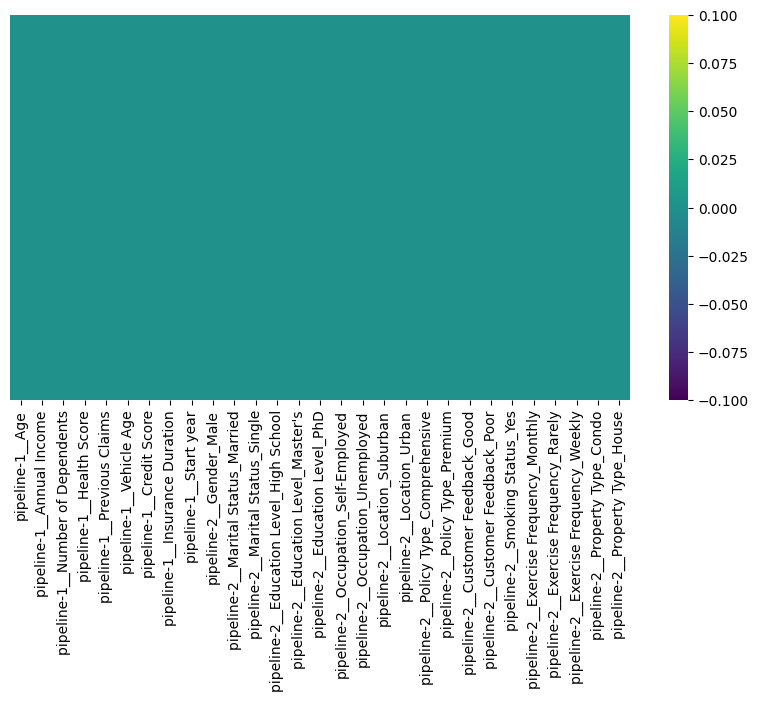

In [16]:
plt.figure(figsize=(10,5))
sns.heatmap(x_train_scaled.isnull(),yticklabels=False,cmap='viridis')
plt.show()

In [17]:
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_log_error

In [18]:
# prompt: LinearRegression, Ridge, Lasso, desicision tree, random forest, SGD, root mean squared error

# from sklearn.tree import DecisionTreeRegressor
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.linear_model import SGDRegressor
# from sklearn.metrics import mean_squared_error

# # Decision Tree
# dt_model = DecisionTreeRegressor(random_state=42)
# dt_model.fit(x_train_scaled, y_train)
# dt_preds = dt_model.predict(x_test_scaled)
# dt_rmse = np.sqrt(mean_squared_error(y_test, dt_preds))
# print(f"Decision Tree RMSE: {dt_rmse}")

# Random Forest
# rf_model = RandomForestRegressor(random_state=42)
# rf_model.fit(x_train_scaled, y_train.values.ravel()) # .values.ravel() to handle potential issues
# rf_preds = rf_model.predict(x_test_scaled)
# rf_rmse = np.sqrt(mean_squared_error(y_test, rf_preds))
# print(f"Random Forest RMSE: {rf_rmse}")


# # SGDRegressor
# sgd_model = SGDRegressor(random_state=42)
# sgd_model.fit(x_train_scaled, y_train.values.ravel())
# sgd_preds = sgd_model.predict(x_test_scaled)
# sgd_rmse = np.sqrt(mean_squared_error(y_test, sgd_preds))
# print(f"SGDRegressor RMSE: {sgd_rmse}")

# ... (Your existing LinearRegression, Ridge, Lasso code) ...

In [ ]:
# prompt: Polynomial Features,SVR,XGBoost, LightGBM

from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
import xgboost as xgb
import lightgbm as lgb
from sklearn.metrics import mean_squared_error
# # Polynomial Features
# poly = PolynomialFeatures(degree=2) # Example degree, adjust as needed
# x_train_poly = poly.fit_transform(x_train_scaled)
# x_test_poly = poly.transform(x_test_scaled)

# # SVR
# svr_model = SVR()
# svr_model.fit(x_train_scaled, y_train.values.ravel())
# svr_preds = svr_model.predict(x_test_scaled)
# svr_rmse = np.sqrt(mean_squared_error(y_test, svr_preds))
# print(f"SVR RMSE: {svr_rmse}")

# XGBoost
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42) # Use appropriate objective
xgb_model.fit(x_train_scaled, y_train.values.ravel())
xgb_preds = xgb_model.predict(x_test_scaled)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_preds))
print(f"XGBoost RMSE: {xgb_rmse}")


# # LightGBM
# lgb_model = lgb.LGBMRegressor(objective='regression', random_state=42) # Use appropriate objective
# lgb_model.fit(x_train_scaled, y_train.values.ravel())
# lgb_preds = lgb_model.predict(x_test_scaled)
# lgb_rmse = np.sqrt(mean_squared_error(y_test, lgb_preds))
# print(f"LightGBM RMSE: {lgb_rmse}")

In [21]:
submission_pred= xgb_model.predict(test_scaled)

AttributeError: 'PolynomialFeatures' object has no attribute 'predict'

In [ ]:
submission_pred

In [ ]:
sub = Preprocess.inverse_transform(submission_pred.flatten().reshape(-1, 1) )
sub

In [ ]:
submit= pd.DataFrame({'id':test_ids.values,'Premium Amount':sub.flatten()})
submit.to_csv('mysubmission_xgb_model.csv',index=False)